# Demonstration of Interpolation and Shading Methods<br>Inspired by Oluwaseun Fadugba's Studies
All examples are based on official documentations to demonstrate multiple colormaps.
## Selected and organised by Yu Geng<br>Last update: 2017-11-19

**Mild colors**
```
'viridis', 'Spectral'
'coolwarm', 'RdYlBu'
'terrain', 'gist_earth', 'ocean'
```
**Bright colors**
```
'gist_rainbow', 'hsv'
'rainbow', 'jet'
```
For all the notebook cells, do not use `%timeit`. It will create duplicated plots.

### Set up environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

matplotlib_default = np.array([6.0, 4.0])
seaborn_default = np.array([8.0, 5.5])

### Disable auto-scrolling

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### `pylab_examples` example code

In [3]:
"""
Demonstrates similarities between pcolor, pcolormesh, imshow and pcolorfast
for drawing quadrilateral grids.

"""
def pcolor_demo(cm='RdBu'):
    # make these smaller to increase the resolution
    dx, dy = 0.15, 0.05

    # generate 2 2d grids for the x & y bounds
    y, x = np.mgrid[slice(-3, 3 + dy, dy),
                    slice(-3, 3 + dx, dx)]
    z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    z = z[:-1, :-1]
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()
    
    plt.rcParams['figure.figsize'] = 2.0 * matplotlib_default  # must be set before suptitle
    plt.suptitle(cm)
    
    plt.subplot(2, 2, 1)
    plt.pcolor(x, y, z, cmap=cm, vmin=z_min, vmax=z_max)
    plt.title('pcolor')
    # set the limits of the plot to the limits of the data
    plt.axis([x.min(), x.max(), y.min(), y.max()])
    plt.colorbar()


    plt.subplot(2, 2, 2)
    plt.pcolormesh(x, y, z, cmap=cm, vmin=z_min, vmax=z_max)
    plt.title('pcolormesh')
    # set the limits of the plot to the limits of the data
    plt.axis([x.min(), x.max(), y.min(), y.max()])
    plt.colorbar()


    plt.subplot(2, 2, 3)
    plt.imshow(z, cmap=cm, vmin=z_min, vmax=z_max,
               extent=[x.min(), x.max(), y.min(), y.max()],
               interpolation='nearest', origin='lower')
    plt.title('image (nearest)')
    plt.colorbar()


    ax = plt.subplot(2, 2, 4)
    ax.pcolorfast(x, y, z, cmap=cm, vmin=z_min, vmax=z_max)
    plt.title('pcolorfast')
    plt.colorbar()

    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    plt.show()

### Try with different colormaps

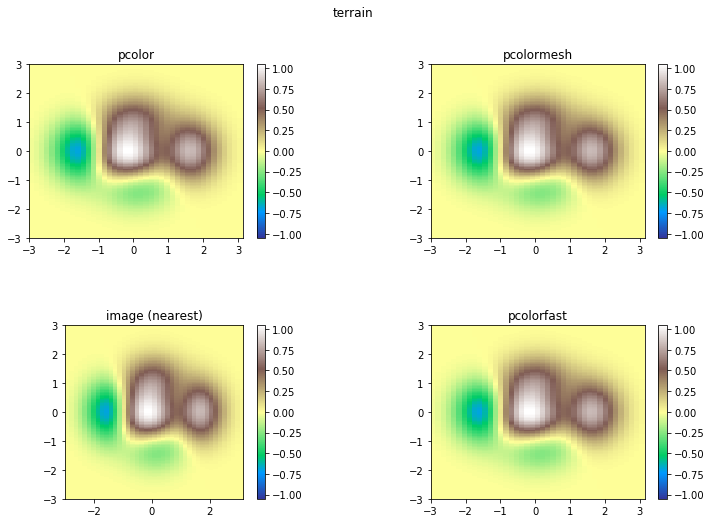

CPU times: user 2.55 s, sys: 263 ms, total: 2.81 s
Wall time: 2.16 s


In [4]:
%time pcolor_demo('terrain')

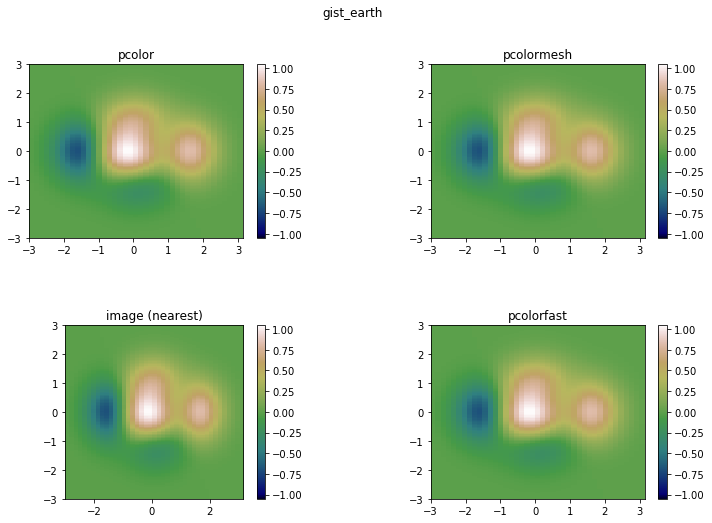

CPU times: user 2.45 s, sys: 224 ms, total: 2.67 s
Wall time: 2.17 s


In [5]:
%time pcolor_demo('gist_earth')

### Show all different interpolation methods for imshow

In [6]:
def interpolation_methods(colormap='viridis'):
    methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
               'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
               'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
    
    np.random.seed(0)
    grid = np.random.rand(4, 4)
    
    fig, axes = plt.subplots(3, 6, figsize=(12, 6),
                             subplot_kw={'xticks': [], 'yticks': []})
    
    fig.subplots_adjust(hspace=0.3, wspace=0.05)
    
    for ax, interp_method in zip(axes.flat, methods):
        ax.imshow(grid, interpolation=interp_method, cmap=colormap)
        ax.set_title(interp_method)
    
    plt.show()

### Try with different colormaps

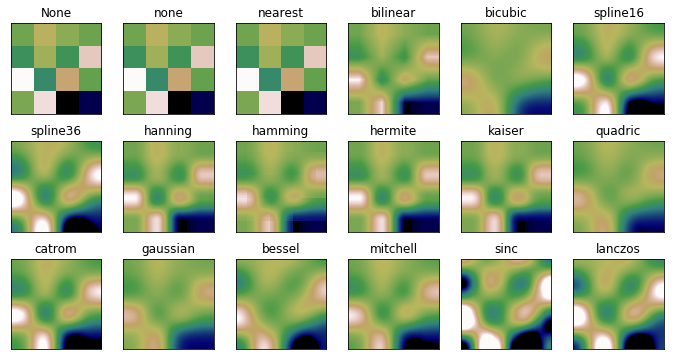

CPU times: user 2.85 s, sys: 184 ms, total: 3.03 s
Wall time: 2.7 s


In [7]:
%time interpolation_methods('gist_earth')

### Scatter plot

In [8]:
import matplotlib.cbook as cbook

# Enter scatter_demo2.py
# Original source code from:
# https://matplotlib.org/examples/pylab_examples/scatter_demo2.html
def scatter_demo2(colormap='viridis'):

    # Fixing random state for reproducibility
    np.random.seed(19680801)

    N = 50
    x = np.random.rand(N)
    y = np.random.rand(N)
    colors = np.random.rand(N)
    area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radi

    datafile = cbook.get_sample_data('goog.npy')
    try:
        price_data = np.load(datafile, encoding='bytes').view(np.recarray)
    except TypeError:
        price_data = np.load(datafile).view(np.recarray)
    price_data = price_data[-250:]  # get the most recent 250 trading days

    delta1 = np.diff(price_data.adj_close)/price_data.adj_close[:-1]

    # Marker size in units of points^2
    volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
    close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

    plt.rcParams['figure.figsize'] = [10, 4.0]
    plt.figure()
    plt.suptitle(colormap)
    
    plt.subplot(1,2,1)
    # plt.title(cm1)
    plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap=colormap)
    
    plt.subplot(1,2,2)
    plt.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5, cmap=colormap)
    
    plt.xlabel(r'$\Delta_i$', fontsize=15)
    plt.ylabel(r'$\Delta_{i+1}$', fontsize=15)
    # plt.title(cm2)
    
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()

### Try with different colormaps

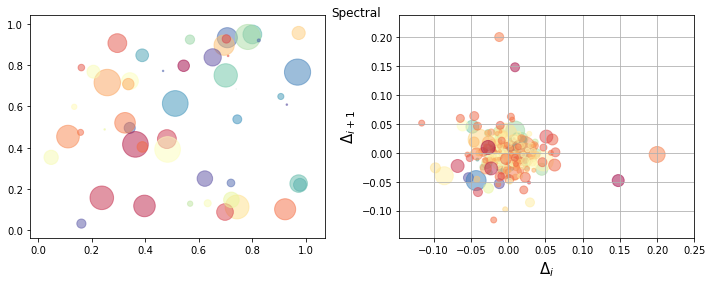

CPU times: user 1.39 s, sys: 176 ms, total: 1.57 s
Wall time: 1.22 s


In [9]:
%time scatter_demo2('Spectral')

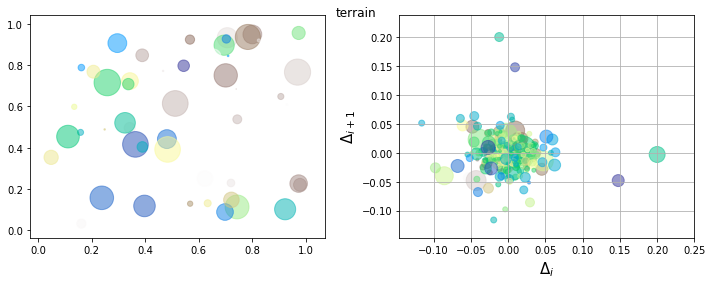

CPU times: user 1.08 s, sys: 146 ms, total: 1.23 s
Wall time: 909 ms


In [10]:
%time scatter_demo2('terrain')

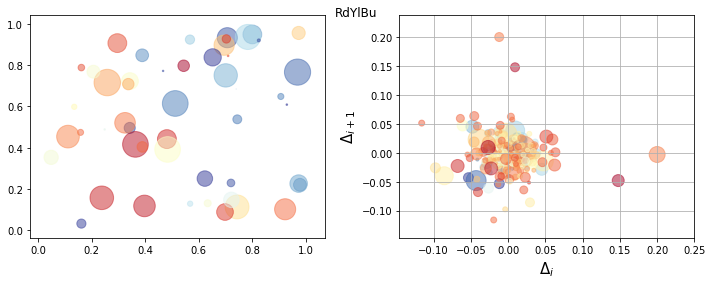

CPU times: user 1.24 s, sys: 168 ms, total: 1.41 s
Wall time: 984 ms


In [11]:
%time scatter_demo2('RdYlBu')

### Chessboard
Based on: https://matplotlib.org/gallery/images_contours_and_fields/layer_images.html

In [12]:
from __future__ import division

def func3(x, y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-(x**2 + y**2))

def chessboard(cmap1='jet', cmap2='rainbow'):
    """This example showcases a nearest-neighbor interpolation."""
    # make these smaller to increase the resolution
    dx, dy = 0.05, 0.05

    x = np.arange(-3.0, 3.0, dx)
    y = np.arange(-3.0, 3.0, dy)
    X, Y = np.meshgrid(x, y)

    extent = np.min(x), np.max(x), np.min(y), np.max(y)

    Z1 = np.add.outer(range(8), range(8)) % 2  # chessboard
    Z2 = func3(X, Y)
    plt.rcParams['figure.figsize'] = [12, 4.0]

    fig = plt.figure(frameon=False)
    # plt.suptitle('This example showcases a nearest-neighbor interpolation')
    
    plt.subplot(1,2,1)
    plt.title(cmap1)
    im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                     extent=extent)
    im2 = plt.imshow(Z2, cmap=cmap1, alpha=.9, interpolation='bilinear',
                     extent=extent)
    
    plt.subplot(1,2,2)
    plt.title(cmap2)
    im1 = plt.imshow(Z1, cmap=plt.cm.gray, interpolation='nearest',
                     extent=extent)
    im2 = plt.imshow(Z2, cmap=cmap2, alpha=.9, interpolation='bilinear',
                     extent=extent)
    
    plt.show()

### Try with different colormaps

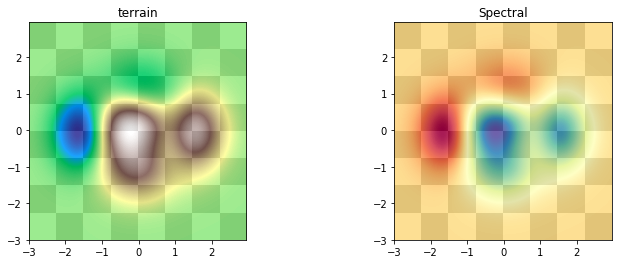

CPU times: user 902 ms, sys: 113 ms, total: 1.02 s
Wall time: 729 ms


In [13]:
%time chessboard('terrain', 'Spectral')

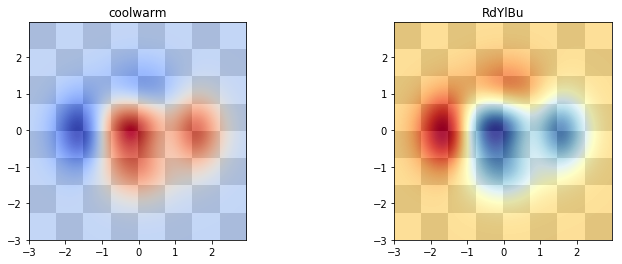

CPU times: user 914 ms, sys: 112 ms, total: 1.03 s
Wall time: 723 ms


In [14]:
%time chessboard('coolwarm', 'RdYlBu')

### 3D scatter plot
Based on: http://chris35wills.github.io/courses/PythonPackages_matplotlib/matplotlib_3d/

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def scatter_3d(cmap1='viridis',cmap2='viridis'):
    xyz=np.array(np.random.random((100,3)))

    x=xyz[:,0]
    y=xyz[:,1]
    z=xyz[:,2]*100

    plt.rcParams['figure.figsize'] = [12, 4.0]
    fig = plt.figure()
    
    ax = plt.subplot(121, projection='3d')
    pnt3d=ax.scatter(x,y,z,c=z,cmap=cmap1)
    cbar=plt.colorbar(pnt3d)
    cbar.set_label("Values (units)")
    plt.title(cmap1)
    # plt.show()
    
    # fig = plt.figure()
    ax = plt.subplot(122, projection='3d')
    pnt3d=ax.scatter(x,y,z,c=z,cmap=cmap2)
    cbar=plt.colorbar(pnt3d)
    cbar.set_label("Values (units)")
    plt.title(cmap2)
    
    plt.show()

### Try with different colormaps

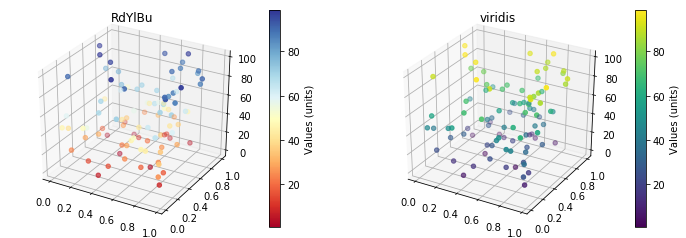

CPU times: user 1.47 s, sys: 192 ms, total: 1.66 s
Wall time: 1.1 s


In [16]:
%time scatter_3d('RdYlBu')

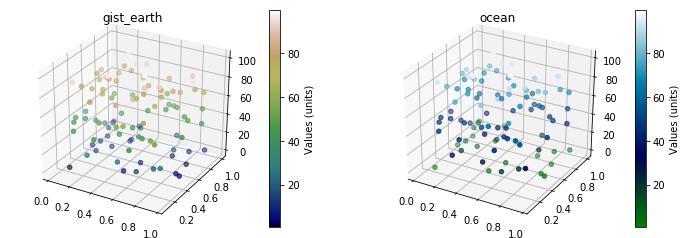

CPU times: user 1.56 s, sys: 203 ms, total: 1.76 s
Wall time: 1.2 s


In [17]:
%time scatter_3d('gist_earth', 'ocean')

### Insert griddata_demo.py
The original source code is from https://matplotlib.org/examples/pylab_examples/griddata_demo.html

In [18]:
from pylab import *
import matplotlib

def griddata_demo(colormap='Spectral'):
    # make up data.
    #npts = int(raw_input('enter # of random points to plot:'))
    seed(0)
    npts = 200
    x = uniform(-2, 2, npts)
    y = uniform(-2, 2, npts)
    z = x*np.exp(-x**2 - y**2)
    # define grid.
    xi = linspace(-2.1, 2.1, 100)
    yi = linspace(-2.1, 2.1, 200)
    # grid the data.
    zi = griddata(x, y, z, xi, yi, interp='linear')
    
    ## Create side-by-side figure to demonstrate different types.
    
    figure
    rcParams['figure.figsize'] = [12, 4.0]
    suptitle(colormap)
    smoother_1, smoother_2 = 15, 60
    
    subplot(1,2,1)
    title('Contour (# of levels = %d)' % smoother_1)
    
    # contour the gridded data, plotting dots at the nonuniform data points.
    CS = contour(xi, yi, zi, smoother_1, linewidths=0.5, colors='k')
    CS = contourf(xi, yi, zi, smoother_1,
                  vmax=abs(zi).max(), vmin=-abs(zi).max(), cmap=colormap)
    
    # normalize colorscale
    norm = matplotlib.colors.Normalize(vmin=CS.vmin, vmax=CS.vmax)
    sm = cm.ScalarMappable(norm=norm, cmap=CS.cmap)
    sm.set_array([])
    
    # create a continuous colorbar
    # colorbar(sm, ticks=CS.levels)  # do not reset tickmarks
    colorbar(sm)  # use default
    
    # plot data points.
    # scatter(x, y, marker='o', s=5, zorder=10)
    xlim(-2, 2)
    ylim(-2, 2)
    
    subplot(1,2,2)
    title('Surface (# of levels = %d)' % smoother_2)
    
    # contour the gridded data, plotting dots at the nonuniform data points.
    # CS = contour(xi, yi, zi, smoother_1, linewidths=0.5, colors='k')
    CS = contourf(xi, yi, zi, smoother_2,
                  vmax=abs(zi).max(), vmin=-abs(zi).max(), cmap=colormap)
    # the more levels you have, the smoother the surface you get
    
    # normalize colorscale
    norm = matplotlib.colors.Normalize(vmin=CS.vmin, vmax=CS.vmax)
    sm = cm.ScalarMappable(norm=norm, cmap=CS.cmap)
    sm.set_array([])
    
    # create a continuous colorbar
    # colorbar(sm, ticks=CS.levels)  # do not reset tickmarks
    colorbar(sm)  # use default
    
    # plot data points.
    scatter(x, y, marker='o', s=5, zorder=10)
    xlim(-2, 2)
    ylim(-2, 2)
    
    show()

### Try with different colormaps

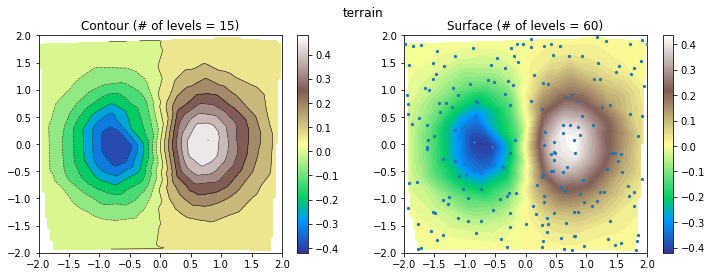

CPU times: user 1.61 s, sys: 187 ms, total: 1.79 s
Wall time: 1.28 s


In [19]:
%time griddata_demo('terrain')

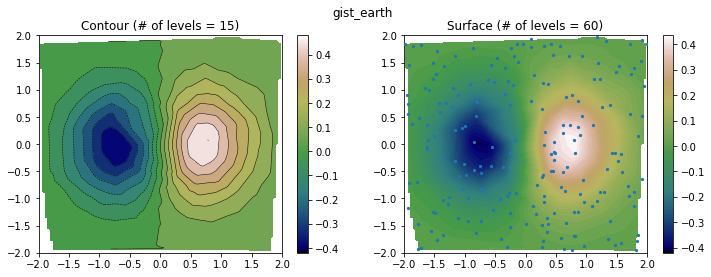

CPU times: user 1.61 s, sys: 191 ms, total: 1.8 s
Wall time: 1.27 s


In [20]:
%time griddata_demo('gist_earth')

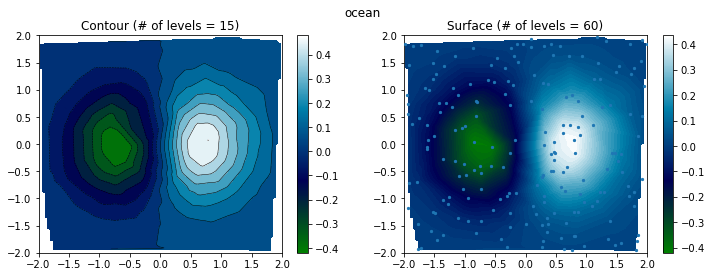

CPU times: user 1.7 s, sys: 169 ms, total: 1.87 s
Wall time: 1.54 s


In [21]:
%time griddata_demo('ocean')

### Surface with triangulation patterns
* `2017-12-11`
* The official example was modified to demonstrate multiple colormaps.

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

def trisurf3d_demo(cmap1='viridis', cmap2='viridis'):
    # fig = plt.figure()
    fig = plt.figure(figsize=plt.figaspect(0.25))
    
    n_radii = 8
    n_angles = 36
    
    # Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
    radii = np.linspace(0.125, 1.0, n_radii)
    angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
    
    # Repeat all angles for each radius.
    angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
    
    # Convert polar (radii, angles) coords to cartesian (x, y) coords.
    # (0, 0) is manually added at this stage,  so there will be no duplicate
    # points in the (x, y) plane.
    x = np.append(0, (radii*np.cos(angles)).flatten())
    y = np.append(0, (radii*np.sin(angles)).flatten())
    
    # Compute z to make the pringle surface.
    z = np.sin(-x*y)
    
    #============
    # First plot
    #============
    
    # fig = plt.figure()
    # plt.rcParams['figure.figsize'] = [12, 4.0]
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True, cmap=cmap1)
    plt.title(cmap1)
    
    #============
    # Second plot
    #============
    
    ax = fig.add_subplot(122, projection='3d')
    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True, cmap=cmap2)
    plt.title(cmap2)
    
    plt.show()

### Try with different colormaps

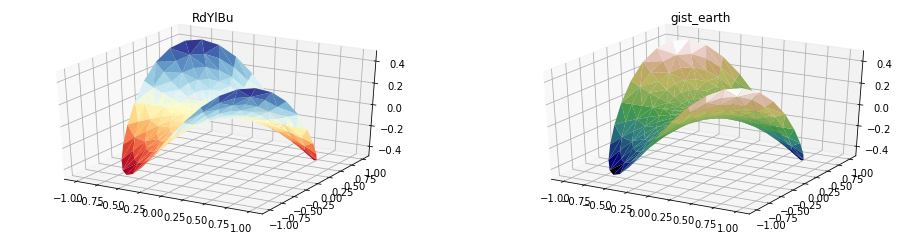

CPU times: user 1.11 s, sys: 50.5 ms, total: 1.16 s
Wall time: 1.08 s


In [23]:
%time trisurf3d_demo('RdYlBu', 'gist_earth')

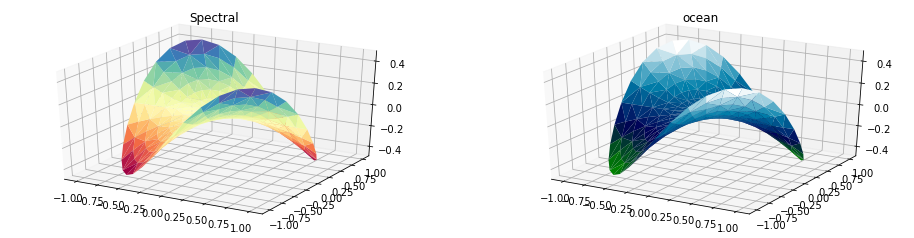

CPU times: user 1.12 s, sys: 48.4 ms, total: 1.17 s
Wall time: 1.27 s


In [24]:
%time trisurf3d_demo('Spectral', 'ocean')

### Contour plots
* Following https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#contour-plots
* The official example was modified to demonstrate multiple colormaps.

In [25]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

def contour3d_demo3(cm1='viridis', cm2='Spectral'):
    fig = plt.figure(figsize=plt.figaspect(0.33))
    # ax = fig.gca(projection='3d')
    ax = plt.subplot(121, projection='3d')
    X, Y, Z = axes3d.get_test_data(0.05)
    ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
    cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm1)
    cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm1)
    cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm1)

    ax.set_xlabel('X')
    ax.set_xlim(-40, 40)
    ax.set_ylabel('Y')
    ax.set_ylim(-40, 40)
    ax.set_zlabel('Z')
    ax.set_zlim(-100, 100)
    ax.set_title(cm1)
    
    ax = plt.subplot(122, projection='3d')
    X, Y, Z = axes3d.get_test_data(0.05)
    ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
    cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm2)
    cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm2)
    cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm2)

    ax.set_xlabel('X')
    ax.set_xlim(-40, 40)
    ax.set_ylabel('Y')
    ax.set_ylim(-40, 40)
    ax.set_zlabel('Z')
    ax.set_zlim(-100, 100)
    ax.set_title(cm2)

    plt.show()

### Try with different colormaps

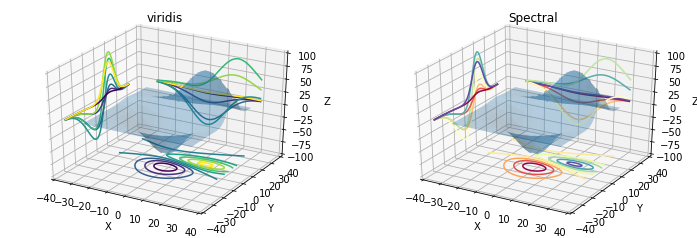

CPU times: user 1.75 s, sys: 61.8 ms, total: 1.82 s
Wall time: 2.06 s


In [26]:
%time contour3d_demo3()

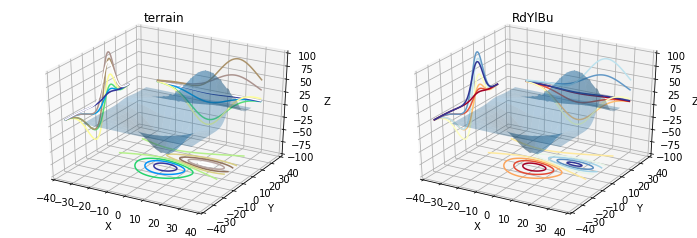

CPU times: user 1.7 s, sys: 71 ms, total: 1.77 s
Wall time: 1.67 s


In [27]:
%time contour3d_demo3('terrain', 'RdYlBu')

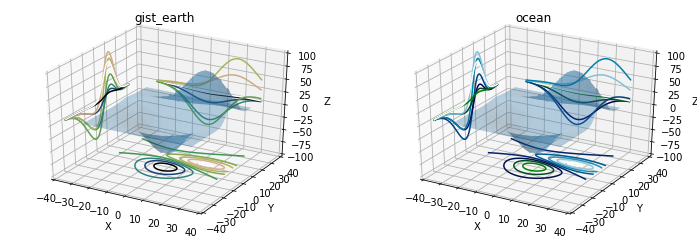

CPU times: user 1.71 s, sys: 80.5 ms, total: 1.79 s
Wall time: 1.61 s


In [28]:
%time contour3d_demo3('gist_earth', 'ocean')